Cleaning Data

1. Remove Rows

In [2]:
import pandas as pd

In [3]:
#Leemos el archivo "data3wschool.csv"
df = pd.read_csv("data3wschool.csv")
#creamos un nuevo df eliminando las filas que tengan valores vacios
#Note: By default, the dropna() method returns a new DataFrame, and will not change the original.
new_df = df.dropna()  #dropna remueve los valores faltantes
#parametros dropna = axis, how, thresh, subset, inplace, ignore_index
new_df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


In [4]:
#If you want to change the original DataFrame, use the inplace = True argument
df2 = pd.read_csv('data3wschool.csv')
df2.dropna(inplace = True)
df2.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


2. Replace empty values

In [6]:
#insert a new value to empty cells in the whole DF
df3 = pd.read_csv('data3wschool.csv')
df3.fillna("fill manual", inplace = True)
#se crea una mascara para filtrar solo las que tenga 'fill manual
mask = df3['Calories'] == 'fill manual'
df3_masked = df3[mask]
print(df3_masked)



    Duration          Date  Pulse  Maxpulse     Calories
18        45  '2020/12/18'     90       112  fill manual
28        60  '2020/12/28'    103       132  fill manual


2.1 Replace only for Specified Columns

In [7]:
#Inser a new value to empty cells only in the select column
df4 = pd.read_csv('data3wschool.csv')
df4['Calories'].fillna('Fill Manual 2', inplace = True)
mask2 = df4['Calories'] == 'Fill Manual 2'
df4_mask2 = df4[mask2]
df4_mask2

,Duration,Date,Pulse,Maxpulse,Calories
18,45,'2020/12/18',90,112,Fill Manual 2
28,60,'2020/12/28',103,132,Fill Manual 2


2.2 Replace using Mean, Median, or Mode

In [27]:
"""Calcular el promedio y llenar las celdas vacías con el valor del promedio"""
# Lee el archivo CSV y carga los datos en un DataFrame llamado df5
df5 = pd.read_csv('data3wschool.csv')
# Calcula el promedio de la columna 'Calories' y almacena el resultado en una variable llamada promedio
promedio = df5['Calories'].mean()
# Rellena los valores faltantes de la columna 'Calories' con el valor promedio calculado anteriormente
df5['Calories'].fillna(promedio, inplace=True)
# Crea una máscara que selecciona todas las filas en la columna 'Calories' donde el valor es igual al promedio calculado anteriormente
mask3 = df5['Calories'] == promedio
# Crea un nuevo DataFrame que contiene solo las filas seleccionadas por la máscara creada en el paso anterior
df5_mask3 = df5[mask3]
# Imprime el nuevo DataFrame
print(df5_mask3)




,Duration,Date,Pulse,Maxpulse,Calories
18,45,'2020/12/18',90,112,304.68
28,60,'2020/12/28',103,132,304.68


In [34]:
"""Calcular el promedio y llenar las celdas vacías con el valor del promedio"""
# Lee el archivo CSV y carga los datos en un DataFrame llamado df6
df6 = pd.read_csv('data3wschool.csv')
# Calcula el promedio de la columna 'Calories' y almacena el resultado en una variable llamada moda
moda = df6['Calories'].mode()[0] #se utiliza [0] para obtener el elemento mas comun (es decir, el primer elemento de la serie)
# Rellena los valores faltantes de la columna 'Calories' con el valor moda calculado anteriormente
df6['Calories'].fillna(moda, inplace=True)
# Crea una máscara que selecciona todas las filas en la columna 'Calories' donde el valor es igual al promedio calculado anteriormente
mask4 = df6['Calories'] == moda
# Crea un nuevo DataFrame que contiene solo las filas seleccionadas por la máscara creada en el paso anterior
df6_mask4 = df6[mask4]
# Imprime el nuevo DataFrame
print(df6_mask4)

    Duration          Date  Pulse  Maxpulse  Calories
5         60  '2020/12/06'    102       127     300.0
17        60  '2020/12/17'    100       120     300.0
18        45  '2020/12/18'     90       112     300.0
23        60  '2020/12/23'    130       101     300.0
28        60  '2020/12/28'    103       132     300.0


In [33]:
df.mode()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/12',100,120,300.0


3. Cleaning Data of Wrong Format

In [2]:
"""Convert to date"""
df7 = pd.read_csv('data3wschool.csv')
df7['Date'] = pd.to_datetime(df7['Date'])
#As you can see from the result, the date in row 26 was fixed, but the empty date in row 22 got a NaT (Not a Time) value,
#in other words an empty value. One way to deal with empty values is simply removing the entire row.
df7

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


In [3]:
"""Removing rows"""
df7.dropna(subset=['Date'], inplace= True)
#subset especifica un subcojunto de columnas o filas en un data fram 
#Sintaxis: df.dropna(subset=['columna1', 'columna2', ...])

df7

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


3.1 Replacing values

In [15]:
df8 = pd.read_csv('data3wschool.csv')
df8 = df8['Duration'][7:9]
#line 7 has a wrong date 450 instead of 45
df8

7    450
8     30
Name: Duration, dtype: int64

In [18]:
df8 = pd.read_csv('data3wschool.csv')
df8.loc[7, 'Duration'] = 45
#Ahora la fila 7 tiene una duración de 45
df8

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,45,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


4. Discovering duplicates

4.1 Discovering duplicates

In [22]:
"""To discover duplicates, we can use duplicated() method"""
df9 = pd.read_csv('data3wschool.csv')
mask5 = df9.duplicated()
duplicados_mask = df9[mask5]
duplicados_mask


,Duration,Date,Pulse,Maxpulse,Calories
12,60,'2020/12/12',100,120,250.7


4.2  Removing duplicates

In [9]:
df10 = pd.read_csv('data3wschool.csv')
df10.drop_duplicates(inplace = True)
#La fila 12 ha sido eliminada
df10.iloc[11:13] #la función iloc permite realizar slicing

,Duration,Date,Pulse,Maxpulse,Calories
11,60,'2020/12/12',100,120,250.7
13,60,'2020/12/13',106,128,345.3


5. Finding relatioships

        #The corr() method calculates the relationship between each column in your data set.

In [15]:
df11 = pd.read_csv('data3wschool.csv')
df11.corr()


/tmp/ipykernel_2110/2995224283.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df11.corr()


,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,0.004410,0.049959,-0.114169
Pulse,0.004410,1.000000,0.276583,0.513186
Maxpulse,0.049959,0.276583,1.000000,0.357460
Calories,-0.114169,0.513186,0.357460,1.000000


Perfect Correlation:
We can see that "Duration" and "Duration" got the number 1.000000, which makes sense, each column always has a perfect relationship with itself.

Good Correlation:
"Duration" and "Calories" got a 0.922721 correlation, which is a very good correlation, and we can predict that the longer you work out, the more calories you burn, and the other way around: if you burned a lot of calories, you probably had a long work out.

Bad Correlation:
"Duration" and "Maxpulse" got a 0.009403 correlation, which is a very bad correlation, meaning that we can not predict the max pulse by just looking at the duration of the work out, and vice versa.

6. Pandas - Plotting

        Pandas uses the plot() method to create diagrams.
        We can use Pyplot, a submodule of the Matplotlib library to visualize the diagram on the screen.

6.1 Plotting

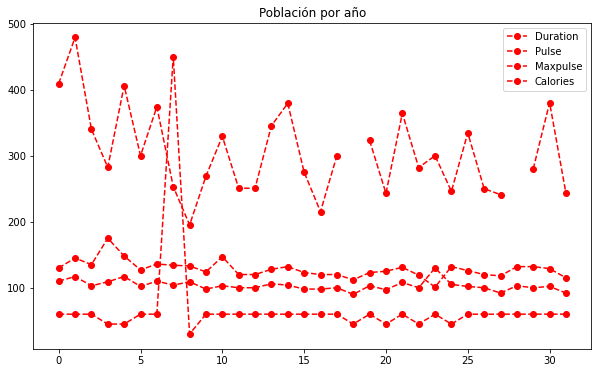

In [43]:
"""Pandas uses the plot() method to create diagrams."""
import pandas as pd
import matplotlib.pyplot as plt


df12 = pd.read_csv('data3wschool.csv')
df12.plot(color='red', linestyle='--', marker='o', figsize=(10,6), legend=True, title='Población por año')

plt.show()


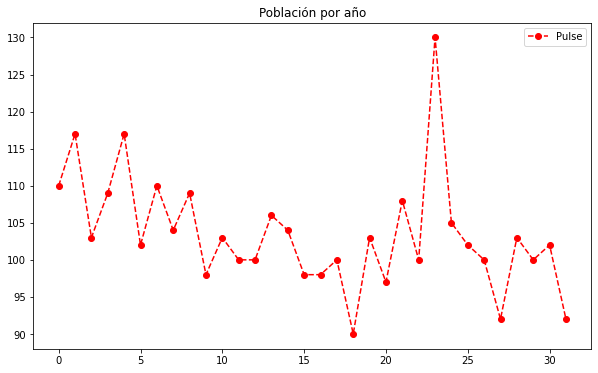

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df12 = pd.read_csv('data3wschool.csv')
df12['Pulse'].plot(color='red', linestyle='--', marker='o', figsize=(10,6), legend=True, title='Población por año')

plt.show()


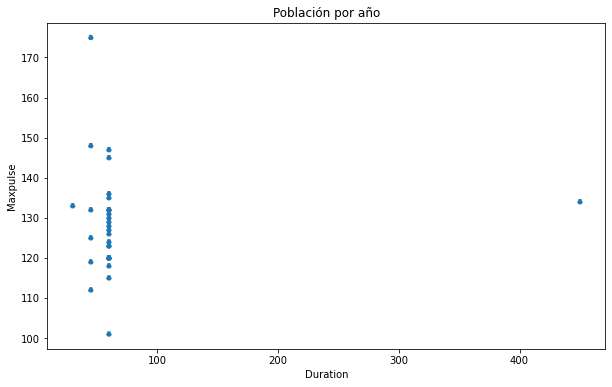

6.2 Scatter plot

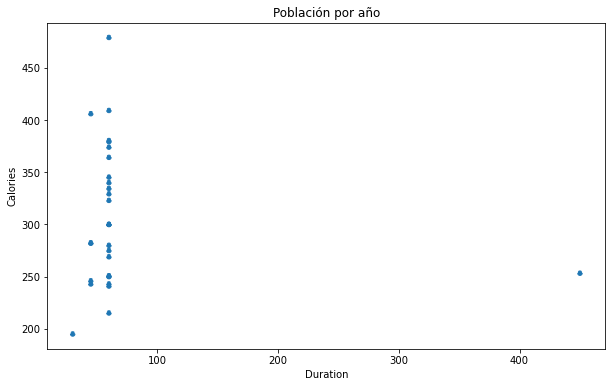

In [48]:
"""Specify that you want a scatter plot with the kind argument:
kind = 'scatter'
A scatter plot needs an x- and a y-axis.
In the example below we will use "Duration" for the x-axis and "Calories" for the y-axis."""

import pandas as pd
import matplotlib.pyplot as plt


df12 = pd.read_csv('data3wschool.csv')
df12.plot(x = 'Duration', y = 'Calories', kind = 'scatter', linestyle='--', marker='o', figsize=(10,6), legend=True, title='Población por año')

plt.show()

6.3 Histogram

    Use the kind argument to specify that you want a histogram:
    kind = 'hist'
    A histogram needs only one column.  

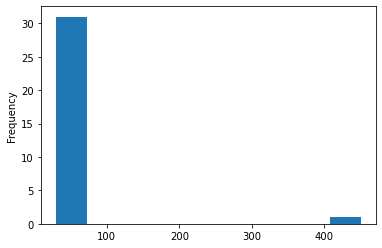

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


df13 = pd.read_csv('data3wschool.csv')
df13['Duration'].plot(kind = 'hist')

plt.show()